# GaussianNB를 이용한 숫자 인식

## 숫자 데이터 적재

이미지 데이터는 3차원 배열, 1797개의 표본을 가지고 있으며, 각 표본은 8*8픽셀 그리드로 구성됨

In [1]:
from sklearn.datasets import load_digits
# 이미지 데이터 digits에 저장 (1797 이미지, 이미지는 8*8로 이루어져있음)
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
digits.images[1796]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

## 데이터 시각화

In [4]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(4, 10, figsize=(10,4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

## 특징 배열과 대상 배열 형성

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
y = digits.target
y.shape

(1797,)

In [8]:
print(y)

[0 1 2 ... 8 9 8]


## 비지도 학습 : 차원 축소

등거리 사상(Isomap)이라는 다양체 학습(manifold learning) 알고리즘 사용해 64차원을 2차원으로 축소함

In [9]:
# Isomap은 각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 
# 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수인 geodesic distance를 유지 하면서
# 차원을 축소한다.
from sklearn.manifold import Isomap
# 2차원으로 등거리 사상
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [10]:
print(data_projected)

[[ 167.27247954  -22.18515653]
 [ -48.71476497  -51.30840484]
 [-100.719723    -25.82132196]
 ...
 [ -51.43618206   23.29369929]
 [  -0.22056414   73.32775967]
 [ -11.36581193   36.23661186]]


## 숫자 데이터의 등거리 사상

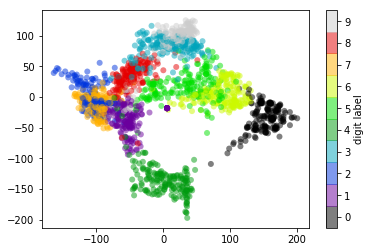

In [11]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

## 가우스 나이브 베이즈 모델을 이용한 숫자 인식

학습 데이터와 검정 데이터 생성

In [12]:
from sklearn.model_selection import train_test_split
# 학습용 데이터와 검증용 데이터로 분리
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [13]:
len(Xtrain)

1347

In [14]:
len(Xtest)

450

## 인식가우스 나이브 베이즈 모델을 이용한 숫자 인식

모델을 데이터에 적합시키고 인식함

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# Xtrain, ytrain으로 모델 학습
model.fit(Xtrain, ytrain)
# Xtest 데이터를 통해 예측
y_model = model.predict(Xtest)

In [16]:
# 예측
print(y_model[100:200])

[5 5 8 5 8 0 7 1 7 7 3 4 8 9 7 7 8 1 6 5 8 5 5 4 1 7 0 6 8 5 8 1 1 5 9 9 5
 7 5 6 8 8 6 7 6 1 5 1 7 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 3 8 6 1 0 7
 1 6 3 8 6 7 4 3 6 3 0 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4]


In [17]:
# 정답
print(ytest[100:200])

[5 5 2 5 9 0 7 1 4 7 3 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5
 7 5 6 2 8 6 9 6 1 5 1 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4
 1 6 3 8 6 7 4 5 6 3 0 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4]


모델의 정확도 측정

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

오차 행렬 생성 및 분석

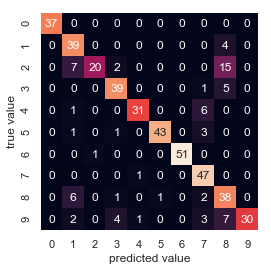

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

# ytest, y_model 행렬화
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

모델이 예측한 레이블로 입력 데이터 플로팅

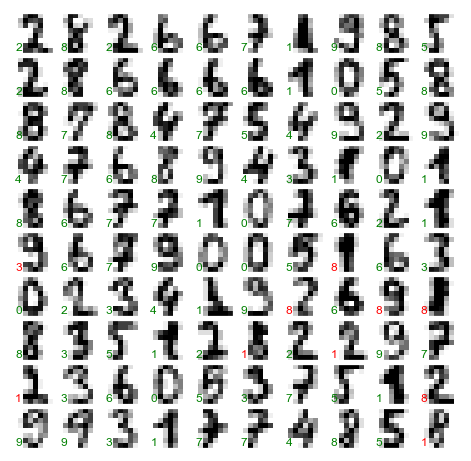

In [20]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            # 예측 결과가 맞으면 초록, 틀리면 빨간색으로 띄움
            color='green' if (ytest[i]==y_model[i]) else 'red')

# SVC를 이용한 얼굴 인식

## 얼굴 데이터셋 적재

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


## 얼굴 이미지 시각화

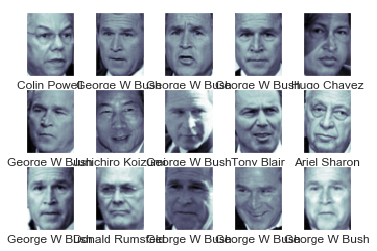

In [22]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], 
            xlabel=faces.target_names[faces.target[i]])

## PCA 전처리와 SVC 학습 모델 생성

PCA : 데이터 분석을 위한 전처리 과정에서 차원을 축소(dimension reduction)하기 위해 사용되는 기법.
상관관계가 있는 변수끼리 가중선형결합(weighted linear combination)해서 변수를 축소시킨다.
주성분 분석이라고도 하며 고차원의 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원의 데이터를 찾아내는 방법.

In [32]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42, 
          svd_solver='randomized')
# rbf : 가우시안 커널. 차수가 무한대인 다항커널과 같음
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

## 학습 모델을 검증하기 위한 데이터 생성 및 검증

교차 검증된 모델 생성

In [24]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, 
                                               random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\leedonguk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 18 s
{'svc__C': 10, 'svc__gamma': 0.001}


## 교차 검증된 모델을 사용해 시험 레이블 예측

In [26]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [27]:
print(yfit)

[3 4 3 6 6 1 3 3 3 1 3 3 0 3 3 1 7 2 3 2 7 7 5 5 0 3 6 7 3 3 0 6 3 3 3 3 2
 3 3 0 3 3 7 1 3 3 0 2 1 2 7 3 7 6 7 3 7 1 7 0 4 2 3 2 5 4 7 3 4 1 1 5 4 1
 3 3 0 4 3 3 1 3 1 0 3 2 3 2 7 1 1 1 2 7 3 7 7 3 3 1 3 7 1 4 3 3 0 3 7 0 3
 1 0 2 3 1 3 2 7 4 7 7 5 2 3 3 3 3 2 2 3 7 0 3 4 3 4 1 2 1 7 6 5 3 3 1 1 3
 5 4 3 2 7 1 7 1 3 7 1 4 6 1 2 3 2 3 1 7 2 2 1 7 3 3 1 1 1 3 3 0 0 4 1 1 7
 1 1 5 3 4 7 3 4 5 6 3 7 3 3 2 3 3 2 3 3 6 3 3 1 7 3 6 1 2 3 1 1 7 6 3 1 3
 1 7 7 2 7 7 5 7 1 3 3 7 4 7 7 2 3 1 3 4 3 1 4 3 1 1 5 1 2 3 4 1 1 1 2 2 3
 7 3 7 3 7 3 1 3 1 3 1 1 1 3 3 1 3 4 3 1 4 1 4 0 3 2 0 2 5 1 3 3 6 2 2 3 6
 3 1 1 5 1 1 7 3 3 3 3 3 3 5 0 1 1 3 3 1 1 7 1 1 1 3 2 1 5 7 3 2 1 3 3 3 3
 7 3 1 1]


## 예측한 이미지의 시각화

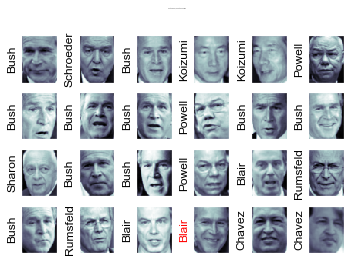

In [28]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=1);

## 레이블 단위의 분류 리포트

In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



## 오차 행렬

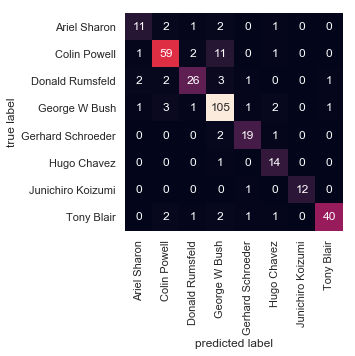

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('predicted label')
plt.ylabel('true label');